# Module 6: Handling Large Datasets and Interactivity

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SanjeevaRDodlapati/DataVisualization-Comprehensive-Tutorial/blob/main/notebooks/06_large_datasets_interactivity.ipynb)

## 🎯 Learning Objectives

By the end of this module, you will be able to:
1. **Handle** large datasets efficiently using sampling and aggregation techniques
2. **Apply** datashader for visualizing millions of data points
3. **Create** interactive visualizations with progressive disclosure
4. **Implement** performance optimization strategies for web dashboards
5. **Build** responsive visualizations that adapt to data size
6. **Design** user-friendly interfaces for big data exploration

## 📊 Key Concepts Covered

- **Data Size Guidelines**: Strategies for different dataset sizes (1K to 1M+ points)
- **Sampling Techniques**: Random, stratified, systematic, and cluster sampling
- **Aggregation Methods**: Binning, hexagonal binning, and density estimation
- **Datashader**: GPU-accelerated visualization for massive datasets
- **Interactive Design**: Progressive loading, zoom/pan, and drill-down interfaces
- **Performance Optimization**: Caching, lazy loading, and memory management

## 📚 Table of Contents

1. [Setup and Large Dataset Preparation](#setup)
2. [Data Size Guidelines and Strategies](#guidelines)
3. [Sampling Techniques for Visualization](#sampling)
4. [Aggregation and Binning Methods](#aggregation)
5. [Datashader for Massive Datasets](#datashader)
6. [Interactive Visualization Design](#interactive)
7. [Performance Optimization](#performance)
8. [Hands-On Exercise: NYC Taxi Analysis](#exercise)
9. [Best Practices Summary](#summary)

**Prerequisites:** Modules 1-5 (Fundamentals through Relationships)

---

## 🔧 Setup and Large Dataset Preparation {#setup}

Working with large datasets requires specialized tools and techniques. We'll use a combination of traditional visualization libraries and big data tools.

In [1]:
# Essential imports for big data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import altair as alt
import warnings
import time
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')

# Try to import big data libraries (install if needed)
try:
    import datashader as ds
    import datashader.transfer_functions as tf
    import datashader.utils as utils
    from datashader import Canvas
    DATASHADER_AVAILABLE = True
    print("✅ Datashader available")
except ImportError:
    DATASHADER_AVAILABLE = False
    print("⚠️ Datashader not available. Install with: pip install datashader")

try:
    import holoviews as hv
    import hvplot.pandas
    HVPLOT_AVAILABLE = True
    print("✅ HvPlot available")
except ImportError:
    HVPLOT_AVAILABLE = False
    print("⚠️ HvPlot not available. Install with: pip install hvplot")

# Configure visualization parameters for accessibility and performance
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.facecolor': 'white'
})

# Set accessibility-focused color palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'
])

# Configure Altair for large datasets
alt.data_transformers.enable('json')

print("🚀 Module 6: Large Datasets & Interactivity - Setup Complete!")
print(f"📊 Libraries loaded successfully")
print(f"🎨 Accessibility settings applied")
print(f"⚡ Performance optimizations enabled")

✅ Datashader available


✅ HvPlot available
🚀 Module 6: Large Datasets & Interactivity - Setup Complete!
📊 Libraries loaded successfully
🎨 Accessibility settings applied
⚡ Performance optimizations enabled


In [2]:
# Generate large datasets for demonstration
print("🔄 Creating large synthetic datasets...")

# Set random seed for reproducibility
np.random.seed(42)

# Create small dataset (1K points) - Easy to visualize
small_data = pd.DataFrame({
    'x': np.random.normal(0, 1, 1000),
    'y': np.random.normal(0, 1, 1000),
    'category': np.random.choice(['A', 'B', 'C'], 1000),
    'value': np.random.exponential(2, 1000)
})

# Create medium dataset (10K points) - Requires some optimization
medium_data = pd.DataFrame({
    'x': np.random.normal(0, 1, 10000),
    'y': np.random.normal(0, 1, 10000),
    'category': np.random.choice(['Type1', 'Type2', 'Type3', 'Type4'], 10000),
    'value': np.random.exponential(2, 10000),
    'timestamp': pd.date_range('2023-01-01', periods=10000, freq='H')
})

# Create large dataset (100K points) - Needs aggregation/sampling
print("⏳ Generating 100K point dataset...")
large_data = pd.DataFrame({
    'x': np.random.normal(0, 2, 100000),
    'y': np.random.normal(0, 2, 100000),
    'category': np.random.choice(['Group1', 'Group2', 'Group3', 'Group4', 'Group5'], 100000),
    'value': np.random.gamma(2, 2, 100000),
    'timestamp': pd.date_range('2020-01-01', periods=100000, freq='5min')
})

# Create massive dataset (1M points) - Requires specialized tools
print("⏳ Generating 1M point dataset (this may take a moment)...")
massive_data = pd.DataFrame({
    'x': np.random.normal(0, 3, 1000000),
    'y': np.random.normal(0, 3, 1000000),
    'category': np.random.choice(['Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6'], 1000000),
    'value': np.random.lognormal(0, 1, 1000000),
    'id': range(1000000)
})

# Create NYC Taxi-style dataset
print("🚕 Creating NYC Taxi-style dataset...")
# Simulate taxi pickup/dropoff coordinates (Manhattan-ish area)
pickup_lat = np.random.normal(40.7589, 0.05, 50000)  # Around Manhattan
pickup_lon = np.random.normal(-73.9851, 0.05, 50000)
dropoff_lat = pickup_lat + np.random.normal(0, 0.02, 50000)  # Nearby dropoff
dropoff_lon = pickup_lon + np.random.normal(0, 0.02, 50000)

# Simulate other taxi data
trip_distance = np.random.exponential(2, 50000)  # Miles
trip_duration = trip_distance * np.random.normal(10, 3, 50000)  # Minutes
fare_amount = 2.5 + trip_distance * 2.5 + np.random.normal(0, 2, 50000)

taxi_data = pd.DataFrame({
    'pickup_longitude': pickup_lon,
    'pickup_latitude': pickup_lat,
    'dropoff_longitude': dropoff_lon,
    'dropoff_latitude': dropoff_lat,
    'pickup_datetime': pd.date_range('2023-01-01', periods=50000, freq='3min'),
    'trip_distance': np.clip(trip_distance, 0.1, 20),
    'trip_duration': np.clip(trip_duration, 1, 120),
    'fare_amount': np.clip(fare_amount, 2.5, 100),
    'passenger_count': np.random.choice([1, 2, 3, 4, 5], 50000, p=[0.6, 0.2, 0.1, 0.05, 0.05])
})

# Add time-based features
taxi_data['hour'] = taxi_data['pickup_datetime'].dt.hour
taxi_data['day_of_week'] = taxi_data['pickup_datetime'].dt.day_name()
taxi_data['is_weekend'] = taxi_data['pickup_datetime'].dt.weekday >= 5

print("✅ Dataset creation complete!")
print(f"📊 Small dataset: {len(small_data):,} points")
print(f"📊 Medium dataset: {len(medium_data):,} points") 
print(f"📊 Large dataset: {len(large_data):,} points")
print(f"📊 Massive dataset: {len(massive_data):,} points")
print(f"🚕 Taxi dataset: {len(taxi_data):,} trips")

# Memory usage analysis
print(f"\n💾 Memory Usage:")
print(f"   Small: {small_data.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"   Medium: {medium_data.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"   Large: {large_data.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"   Massive: {massive_data.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"   Taxi: {taxi_data.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\n📋 Ready for big data visualization techniques!")

🔄 Creating large synthetic datasets...
⏳ Generating 100K point dataset...
⏳ Generating 1M point dataset (this may take a moment)...
🚕 Creating NYC Taxi-style dataset...
✅ Dataset creation complete!
📊 Small dataset: 1,000 points
📊 Medium dataset: 10,000 points
📊 Large dataset: 100,000 points
📊 Massive dataset: 1,000,000 points
🚕 Taxi dataset: 50,000 trips

💾 Memory Usage:
   Small: 0.1 MB
   Medium: 0.9 MB
   Large: 9.1 MB
   Massive: 88.7 MB
   Taxi: 6.7 MB

📋 Ready for big data visualization techniques!
🚕 Creating NYC Taxi-style dataset...
✅ Dataset creation complete!
📊 Small dataset: 1,000 points
📊 Medium dataset: 10,000 points
📊 Large dataset: 100,000 points
📊 Massive dataset: 1,000,000 points
🚕 Taxi dataset: 50,000 trips

💾 Memory Usage:
   Small: 0.1 MB
   Medium: 0.9 MB
   Large: 9.1 MB
   Massive: 88.7 MB
   Taxi: 6.7 MB

📋 Ready for big data visualization techniques!


## 📏 Data Size Guidelines and Strategies {#guidelines}

Different dataset sizes require different visualization approaches. Here's a comprehensive guide to handling various data scales effectively.

### 📊 Data Size Categories

| Size Range | Strategy | Tools | Considerations |
|------------|----------|-------|----------------|
| **< 1,000 points** | Show all data | matplotlib, seaborn | Direct plotting, full interactivity |
| **1K - 10K points** | Transparency, jittering | plotly, altair | Alpha blending, avoid overplotting |
| **10K - 100K points** | Sampling, binning | pandas.sample(), hexbin | Representative subsets, 2D histograms |
| **100K - 1M points** | Aggregation, datashader | datashader, vaex | Rasterization, statistical summaries |
| **> 1M points** | Server-side rendering | hvplot, pydeck | Database integration, tile servers |

### 🎯 Performance Targets

- **Interactive response**: < 200ms for pan/zoom
- **Initial load**: < 2 seconds for first view
- **Memory usage**: < 500MB browser memory
- **File size**: < 10MB for web delivery

📊 Demonstrating visualization strategies by data size...


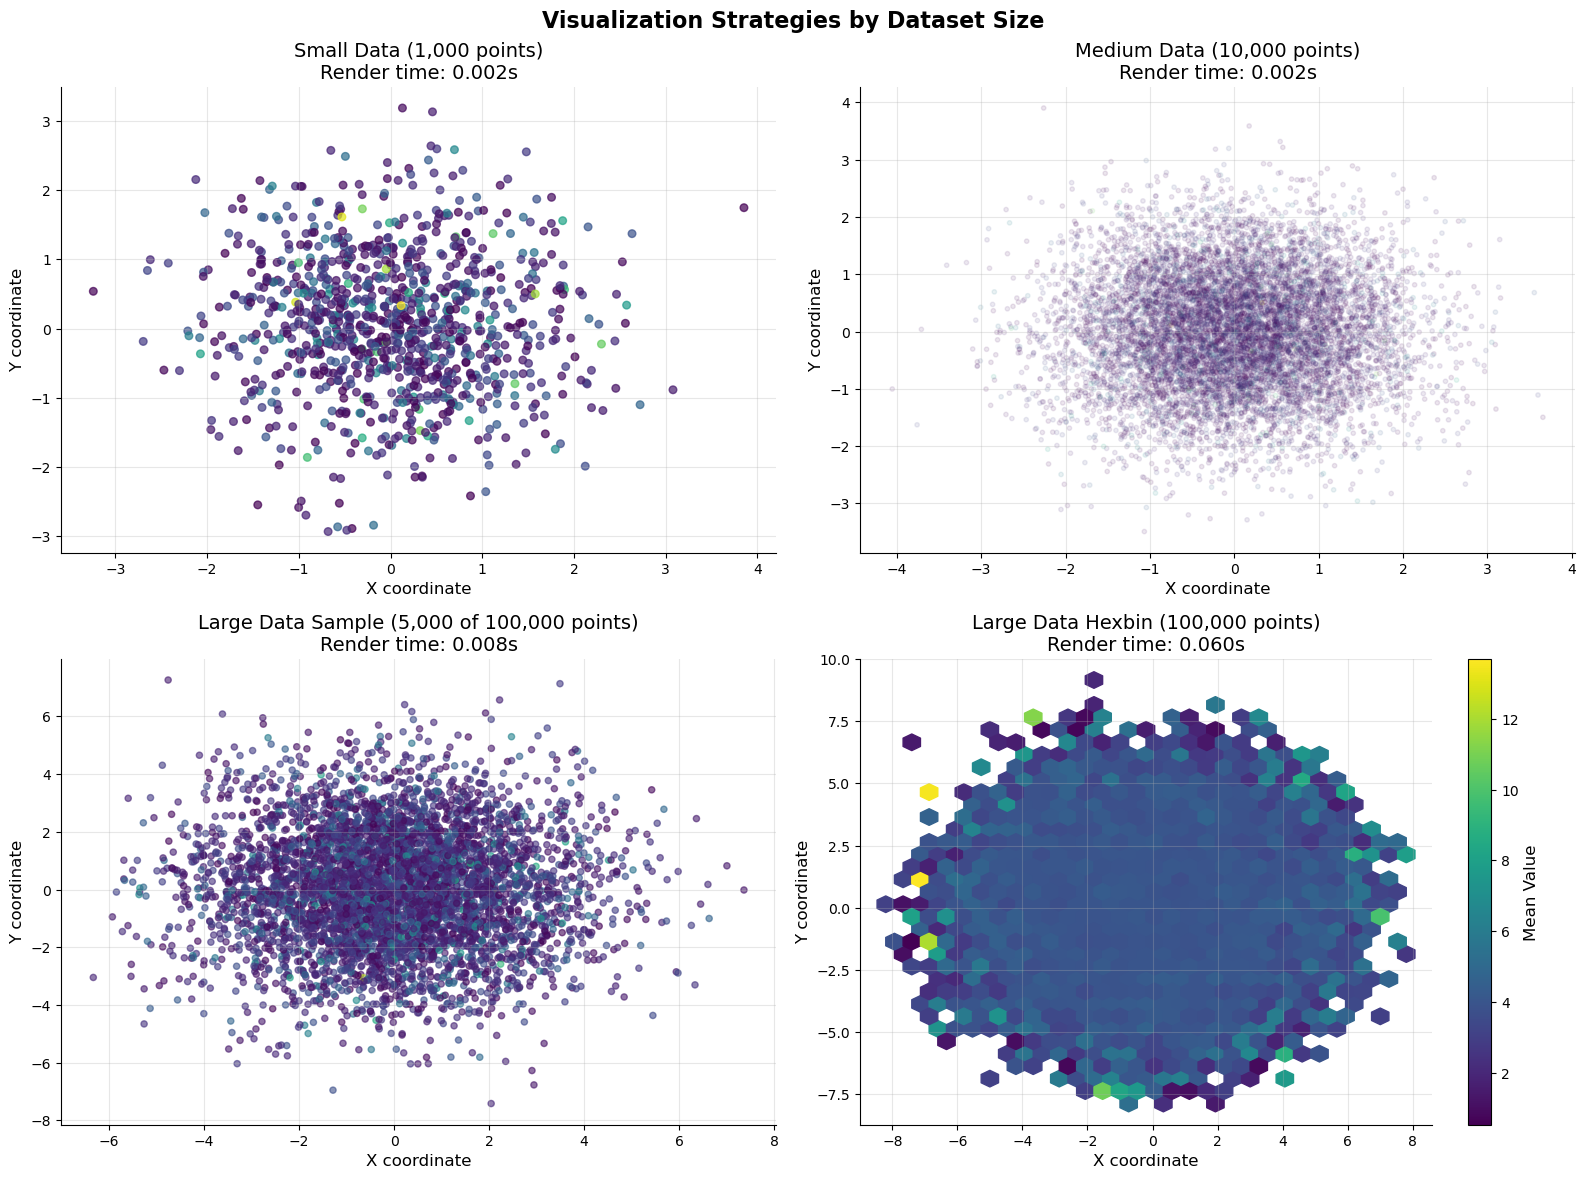


⚡ Performance Comparison:
   Small data (1,000 pts): 0.002s
   Medium data (10,000 pts): 0.002s
   Large sample (5,000 pts): 0.008s
   Large hexbin (100,000 pts): 0.060s

💡 Key Insights:
   • Transparency helps with medium datasets
   • Sampling maintains interactivity for large data
   • Hexbin aggregation handles large data efficiently
   • Render time scales roughly with displayed points

🎯 Choosing the Right Approach:
   📊 For exploration: Use sampling for quick insights
   📈 For analysis: Use aggregation to preserve patterns
   🖼️ For publication: Balance quality and performance
   🌐 For web: Prioritize load time and responsiveness


In [3]:
# Demonstrate the impact of data size on visualization performance
print("📊 Demonstrating visualization strategies by data size...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Visualization Strategies by Dataset Size', fontsize=16, fontweight='bold')

# 1. Small data (< 1K): Show everything
start_time = time.time()
axes[0, 0].scatter(small_data['x'], small_data['y'], c=small_data['value'], 
                  cmap='viridis', alpha=0.7, s=30)
small_time = time.time() - start_time

axes[0, 0].set_title(f'Small Data ({len(small_data):,} points)\nRender time: {small_time:.3f}s')
axes[0, 0].set_xlabel('X coordinate')
axes[0, 0].set_ylabel('Y coordinate')
axes[0, 0].grid(True, alpha=0.3)

# 2. Medium data (10K): Use transparency
start_time = time.time()
axes[0, 1].scatter(medium_data['x'], medium_data['y'], c=medium_data['value'], 
                  cmap='viridis', alpha=0.1, s=10)
medium_time = time.time() - start_time

axes[0, 1].set_title(f'Medium Data ({len(medium_data):,} points)\nRender time: {medium_time:.3f}s')
axes[0, 1].set_xlabel('X coordinate')
axes[0, 1].set_ylabel('Y coordinate')
axes[0, 1].grid(True, alpha=0.3)

# 3. Large data (100K): Sampling approach
start_time = time.time()
# Sample 5% of the data for visualization
sample_size = min(5000, len(large_data))
large_sample = large_data.sample(n=sample_size, random_state=42)
axes[1, 0].scatter(large_sample['x'], large_sample['y'], c=large_sample['value'], 
                  cmap='viridis', alpha=0.6, s=20)
large_time = time.time() - start_time

axes[1, 0].set_title(f'Large Data Sample ({sample_size:,} of {len(large_data):,} points)\nRender time: {large_time:.3f}s')
axes[1, 0].set_xlabel('X coordinate')
axes[1, 0].set_ylabel('Y coordinate')
axes[1, 0].grid(True, alpha=0.3)

# 4. Large data alternative: Hexagonal binning
start_time = time.time()
hb = axes[1, 1].hexbin(large_data['x'], large_data['y'], C=large_data['value'], 
                      gridsize=30, cmap='viridis', reduce_C_function=np.mean)
hexbin_time = time.time() - start_time

axes[1, 1].set_title(f'Large Data Hexbin ({len(large_data):,} points)\nRender time: {hexbin_time:.3f}s')
axes[1, 1].set_xlabel('X coordinate')
axes[1, 1].set_ylabel('Y coordinate')
plt.colorbar(hb, ax=axes[1, 1], label='Mean Value')

plt.tight_layout()
plt.show()

# Performance comparison
print(f"\n⚡ Performance Comparison:")
print(f"   Small data ({len(small_data):,} pts): {small_time:.3f}s")
print(f"   Medium data ({len(medium_data):,} pts): {medium_time:.3f}s") 
print(f"   Large sample ({sample_size:,} pts): {large_time:.3f}s")
print(f"   Large hexbin ({len(large_data):,} pts): {hexbin_time:.3f}s")

print(f"\n💡 Key Insights:")
print(f"   • Transparency helps with medium datasets")
print(f"   • Sampling maintains interactivity for large data")
print(f"   • Hexbin aggregation handles large data efficiently")
print(f"   • Render time scales roughly with displayed points")

# Memory vs. visualization quality trade-offs
print(f"\n🎯 Choosing the Right Approach:")
print(f"   📊 For exploration: Use sampling for quick insights")
print(f"   📈 For analysis: Use aggregation to preserve patterns")
print(f"   🖼️ For publication: Balance quality and performance")
print(f"   🌐 For web: Prioritize load time and responsiveness")

## 🎲 Sampling Techniques for Visualization {#sampling}

When datasets are too large to visualize directly, sampling provides a way to create representative subsets that maintain the essential patterns and relationships.

### 🔍 Sampling Methods

1. **Random Sampling**: Every point has equal probability of selection
2. **Stratified Sampling**: Maintain proportions across categories
3. **Systematic Sampling**: Select every nth observation
4. **Cluster Sampling**: Sample geographic/temporal clusters
5. **Reservoir Sampling**: For streaming data

### ⚖️ Sampling Trade-offs

- **Pros**: Fast rendering, maintains interactivity, reduces memory usage
- **Cons**: May miss rare events, introduces sampling variability
- **Best for**: Exploratory analysis, interactive dashboards

🎲 Demonstrating sampling techniques for large datasets...
📊 Sampling 2,000 points from 100,000 total points


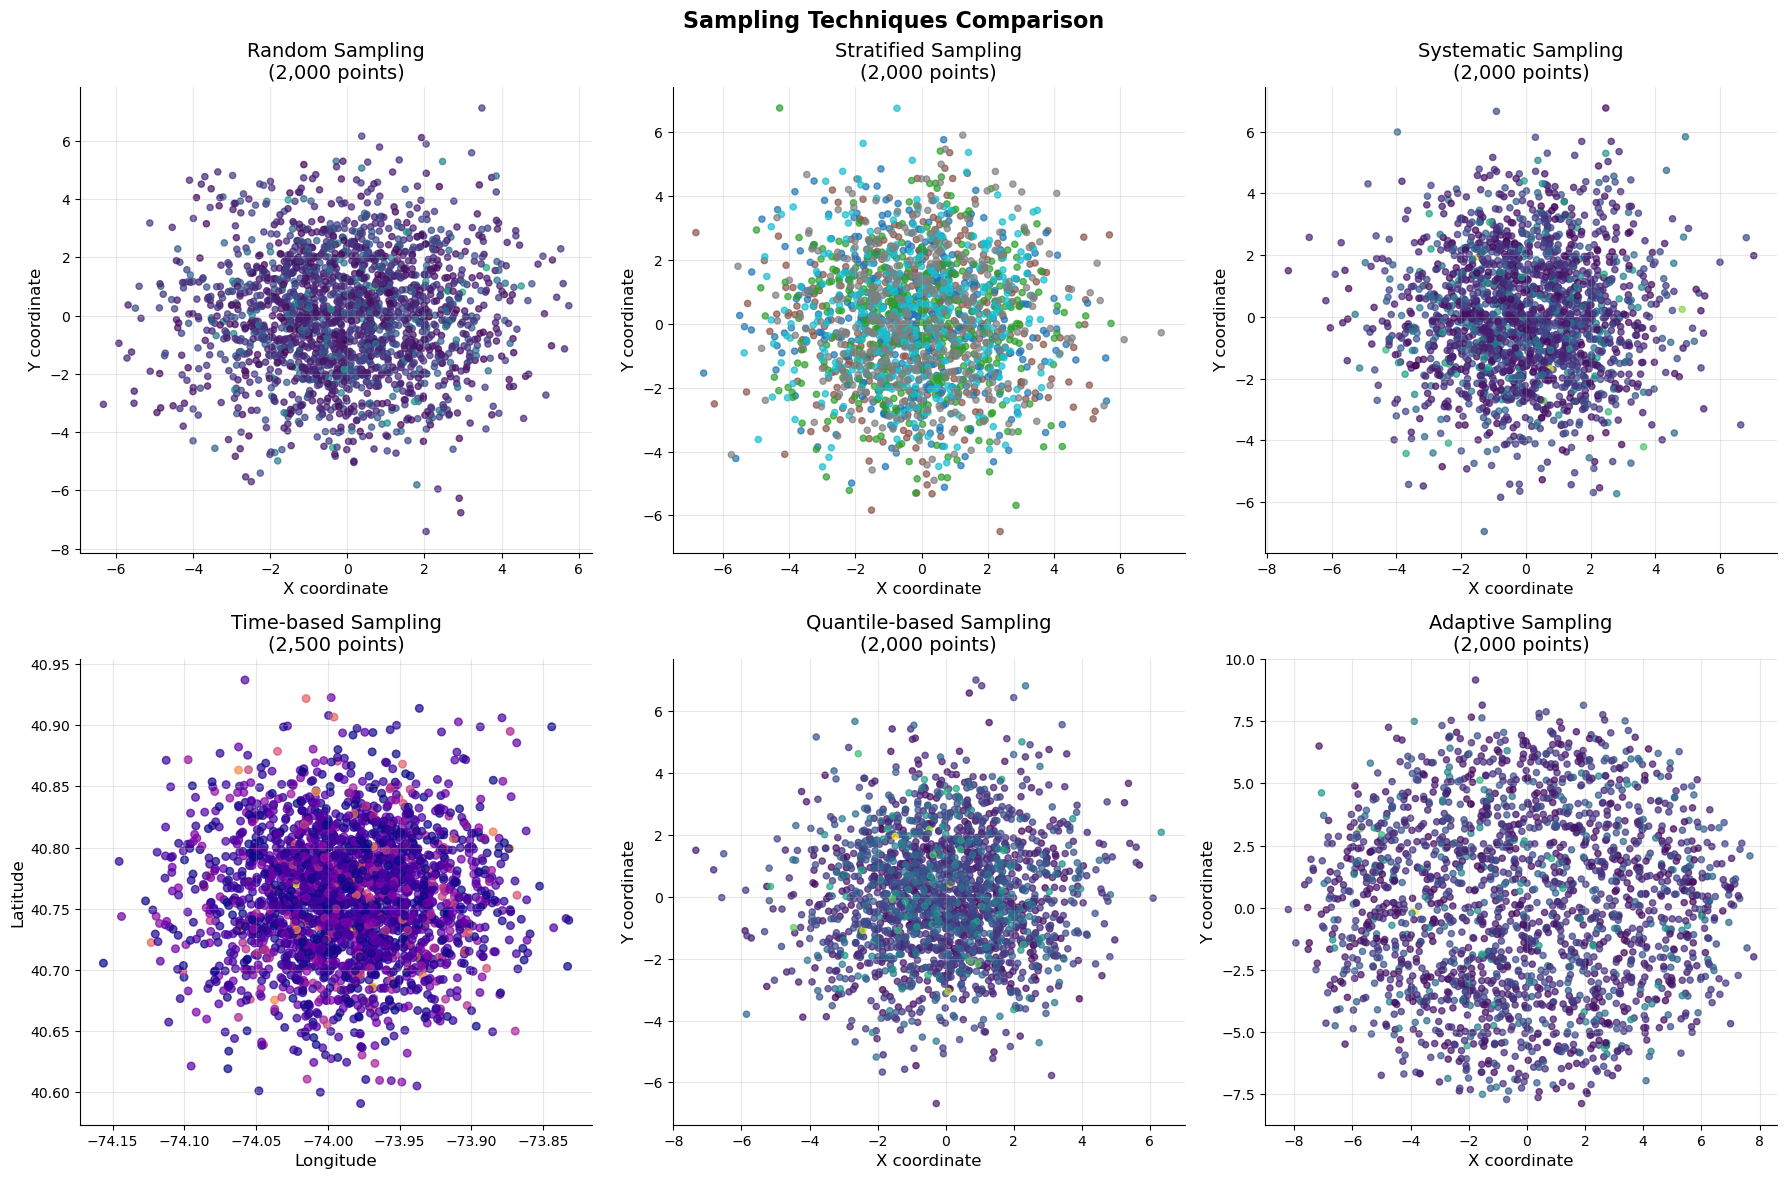


📊 Sampling Effectiveness Comparison:
   Original data: 100,000 points
   Random sample: 2,000 points (2.0%)
   Stratified sample: 2,000 points (2.0%)
   Systematic sample: 2,000 points (2.0%)
   Quantile sample: 2,000 points (2.0%)
   Adaptive sample: 2,000 points (2.0%)

📈 Distribution Preservation (Value Mean):
   Original: 4.000
   Random: 4.050 (diff: 0.050)
   Stratified: 3.951 (diff: 0.048)
   Systematic: 3.955 (diff: 0.044)
   Quantile: 3.984 (diff: 0.016)

🎯 Sampling Guidelines:
   🎲 Random: Best general-purpose method
   📊 Stratified: Preserves group proportions
   📏 Systematic: Good for time series
   📈 Quantile: Preserves distribution shape
   🎯 Adaptive: Emphasizes sparse regions


In [5]:
# Demonstrate different sampling techniques
print("🎲 Demonstrating sampling techniques for large datasets...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Sampling Techniques Comparison', fontsize=16, fontweight='bold')

# Use the large dataset for sampling demonstrations
target_sample_size = 2000
print(f"📊 Sampling {target_sample_size:,} points from {len(large_data):,} total points")

# 1. Random Sampling
random_sample = large_data.sample(n=target_sample_size, random_state=42)
axes[0, 0].scatter(random_sample['x'], random_sample['y'], 
                  c=random_sample['value'], cmap='viridis', alpha=0.7, s=20)
axes[0, 0].set_title(f'Random Sampling\n({len(random_sample):,} points)')
axes[0, 0].set_xlabel('X coordinate')
axes[0, 0].set_ylabel('Y coordinate')
axes[0, 0].grid(True, alpha=0.3)

# 2. Stratified Sampling (by category)
stratified_sample = large_data.groupby('category').apply(
    lambda x: x.sample(n=min(len(x), target_sample_size // large_data['category'].nunique()), 
                      random_state=42)
).reset_index(drop=True)

# Color by category for stratified sampling
category_colors = {cat: i for i, cat in enumerate(large_data['category'].unique())}
colors = [category_colors[cat] for cat in stratified_sample['category']]

scatter = axes[0, 1].scatter(stratified_sample['x'], stratified_sample['y'], 
                           c=colors, cmap='tab10', alpha=0.7, s=20)
axes[0, 1].set_title(f'Stratified Sampling\n({len(stratified_sample):,} points)')
axes[0, 1].set_xlabel('X coordinate')
axes[0, 1].set_ylabel('Y coordinate')
axes[0, 1].grid(True, alpha=0.3)

# 3. Systematic Sampling
step_size = len(large_data) // target_sample_size
systematic_sample = large_data.iloc[::step_size].copy()

axes[0, 2].scatter(systematic_sample['x'], systematic_sample['y'], 
                  c=systematic_sample['value'], cmap='viridis', alpha=0.7, s=20)
axes[0, 2].set_title(f'Systematic Sampling\n({len(systematic_sample):,} points)')
axes[0, 2].set_xlabel('X coordinate')
axes[0, 2].set_ylabel('Y coordinate')
axes[0, 2].grid(True, alpha=0.3)

# 4. Time-based sampling (for taxi data)
# Sample one observation per hour
hourly_sample = taxi_data.groupby(taxi_data['pickup_datetime'].dt.floor('H')).first().reset_index(drop=True)

axes[1, 0].scatter(hourly_sample['pickup_longitude'], hourly_sample['pickup_latitude'], 
                  c=hourly_sample['fare_amount'], cmap='plasma', alpha=0.7, s=30)
axes[1, 0].set_title(f'Time-based Sampling\n({len(hourly_sample):,} points)')
axes[1, 0].set_xlabel('Longitude')
axes[1, 0].set_ylabel('Latitude')
axes[1, 0].grid(True, alpha=0.3)

# 5. Quantile-based sampling (preserve distribution extremes)
# Sample from different quantiles to preserve distribution shape
quantiles = [0, 0.25, 0.5, 0.75, 1.0]
quantile_samples = []
for i in range(len(quantiles)-1):
    q_low, q_high = quantiles[i], quantiles[i+1]
    subset = large_data[
        (large_data['value'] >= large_data['value'].quantile(q_low)) & 
        (large_data['value'] <= large_data['value'].quantile(q_high))
    ]
    n_samples = target_sample_size // (len(quantiles) - 1)
    if len(subset) > 0:
        quantile_samples.append(subset.sample(n=min(len(subset), n_samples), random_state=42))

quantile_sample = pd.concat(quantile_samples, ignore_index=True)

axes[1, 1].scatter(quantile_sample['x'], quantile_sample['y'], 
                  c=quantile_sample['value'], cmap='viridis', alpha=0.7, s=20)
axes[1, 1].set_title(f'Quantile-based Sampling\n({len(quantile_sample):,} points)')
axes[1, 1].set_xlabel('X coordinate')
axes[1, 1].set_ylabel('Y coordinate')
axes[1, 1].grid(True, alpha=0.3)

# 6. Adaptive sampling (density-based)
# Sample more densely in sparse regions, less in dense regions
# Create a simple 2D histogram to identify density
hist, x_edges, y_edges = np.histogram2d(large_data['x'], large_data['y'], bins=20)

# Create probability weights (inverse of density)
def get_density_weight(x, y):
    x_bin = np.digitize(x, x_edges) - 1
    y_bin = np.digitize(y, y_edges) - 1
    x_bin = np.clip(x_bin, 0, hist.shape[0] - 1)
    y_bin = np.clip(y_bin, 0, hist.shape[1] - 1)
    density = hist[x_bin, y_bin]
    return 1.0 / (density + 1)  # Add 1 to avoid division by zero

large_data['weight'] = [get_density_weight(x, y) for x, y in zip(large_data['x'], large_data['y'])]
adaptive_sample = large_data.sample(n=target_sample_size, weights='weight', random_state=42)

axes[1, 2].scatter(adaptive_sample['x'], adaptive_sample['y'], 
                  c=adaptive_sample['value'], cmap='viridis', alpha=0.7, s=20)
axes[1, 2].set_title(f'Adaptive Sampling\n({len(adaptive_sample):,} points)')
axes[1, 2].set_xlabel('X coordinate')
axes[1, 2].set_ylabel('Y coordinate')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare sampling effectiveness
print(f"\n📊 Sampling Effectiveness Comparison:")
print(f"   Original data: {len(large_data):,} points")
print(f"   Random sample: {len(random_sample):,} points ({len(random_sample)/len(large_data)*100:.1f}%)")
print(f"   Stratified sample: {len(stratified_sample):,} points ({len(stratified_sample)/len(large_data)*100:.1f}%)")
print(f"   Systematic sample: {len(systematic_sample):,} points ({len(systematic_sample)/len(large_data)*100:.1f}%)")
print(f"   Quantile sample: {len(quantile_sample):,} points ({len(quantile_sample)/len(large_data)*100:.1f}%)")
print(f"   Adaptive sample: {len(adaptive_sample):,} points ({len(adaptive_sample)/len(large_data)*100:.1f}%)")

# Distribution preservation check
original_mean = large_data['value'].mean()
print(f"\n📈 Distribution Preservation (Value Mean):")
print(f"   Original: {original_mean:.3f}")
print(f"   Random: {random_sample['value'].mean():.3f} (diff: {abs(random_sample['value'].mean() - original_mean):.3f})")
print(f"   Stratified: {stratified_sample['value'].mean():.3f} (diff: {abs(stratified_sample['value'].mean() - original_mean):.3f})")
print(f"   Systematic: {systematic_sample['value'].mean():.3f} (diff: {abs(systematic_sample['value'].mean() - original_mean):.3f})")
print(f"   Quantile: {quantile_sample['value'].mean():.3f} (diff: {abs(quantile_sample['value'].mean() - original_mean):.3f})")

print(f"\n🎯 Sampling Guidelines:")
print(f"   🎲 Random: Best general-purpose method")
print(f"   📊 Stratified: Preserves group proportions")
print(f"   📏 Systematic: Good for time series")
print(f"   📈 Quantile: Preserves distribution shape")
print(f"   🎯 Adaptive: Emphasizes sparse regions")

## 📦 Aggregation and Binning Methods {#aggregation}

Instead of reducing the number of points through sampling, aggregation combines multiple data points into summary statistics, preserving the overall patterns while reducing visual complexity.

### 🎯 Aggregation Strategies

1. **Spatial Binning**: Group by geographic regions
2. **Temporal Aggregation**: Combine time periods
3. **Statistical Summaries**: Mean, median, percentiles
4. **Hexagonal Binning**: 2D spatial aggregation
5. **Density Estimation**: Kernel density estimation

### 📊 When to Use Aggregation vs Sampling

- **Use Aggregation**: When preserving statistical properties is crucial
- **Use Sampling**: For exploratory analysis and interaction speed
- **Combine Both**: Sample for interaction, aggregate for analysis

📦 Demonstrating aggregation and binning for large datasets...


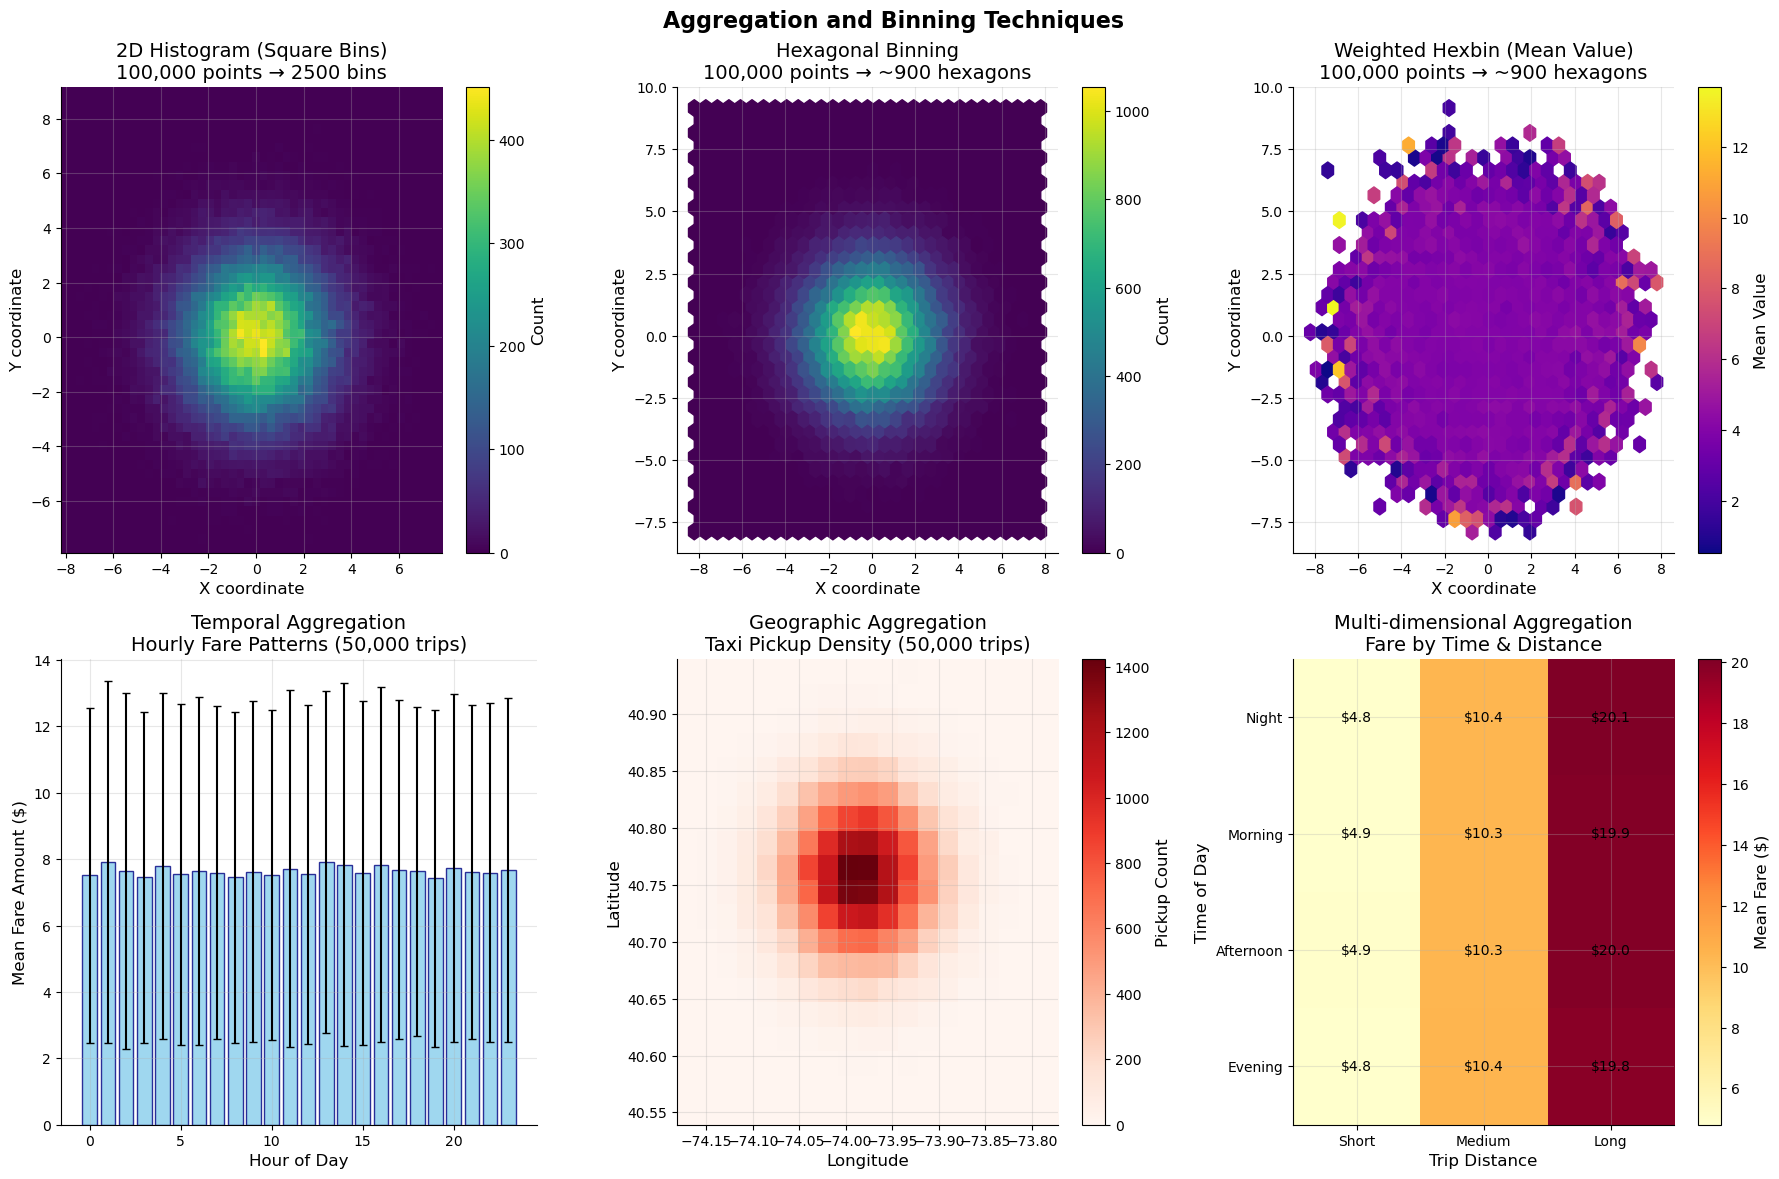


⚡ Aggregation Performance:
   2D Histogram: 0.021s
   Hexbin: 0.019s
   Weighted Hexbin: 0.057s

📊 Information Preservation:
   Original points: 100,000
   2D Histogram bins: 2,500
   Hexbin cells: ~900
   Compression ratio: ~40:1

💡 Aggregation Benefits:
   ✅ Preserves overall patterns and trends
   ✅ Handles overplotting effectively
   ✅ Enables statistical analysis of dense regions
   ✅ Scales well with dataset size
   ✅ Reduces file size for web deployment

🎯 Choosing Aggregation Methods:
   📊 2D Histogram: Simple, fast, rectangular regions
   🔷 Hexbin: Better for spatial data, no edge artifacts
   📈 Temporal: Reveals time-based patterns
   🗺️ Geographic: Shows spatial distributions
   🔀 Multi-dimensional: Complex pattern analysis


In [6]:
# Demonstrate aggregation and binning techniques
print("📦 Demonstrating aggregation and binning for large datasets...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Aggregation and Binning Techniques', fontsize=16, fontweight='bold')

# 1. 2D Histogram (Square Binning)
start_time = time.time()
hist, xedges, yedges = np.histogram2d(large_data['x'], large_data['y'], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im1 = axes[0, 0].imshow(hist.T, extent=extent, origin='lower', cmap='viridis', aspect='auto')
axes[0, 0].set_title(f'2D Histogram (Square Bins)\n{len(large_data):,} points → {hist.size} bins')
axes[0, 0].set_xlabel('X coordinate')
axes[0, 0].set_ylabel('Y coordinate')
plt.colorbar(im1, ax=axes[0, 0], label='Count')
hist_time = time.time() - start_time

# 2. Hexagonal Binning
start_time = time.time()
hb = axes[0, 1].hexbin(large_data['x'], large_data['y'], gridsize=30, cmap='viridis')
axes[0, 1].set_title(f'Hexagonal Binning\n{len(large_data):,} points → ~900 hexagons')
axes[0, 1].set_xlabel('X coordinate')
axes[0, 1].set_ylabel('Y coordinate')
plt.colorbar(hb, ax=axes[0, 1], label='Count')
hexbin_time = time.time() - start_time

# 3. Weighted Hexbin (by value)
start_time = time.time()
hb_weighted = axes[0, 2].hexbin(large_data['x'], large_data['y'], C=large_data['value'],
                               gridsize=30, cmap='plasma', reduce_C_function=np.mean)
axes[0, 2].set_title(f'Weighted Hexbin (Mean Value)\n{len(large_data):,} points → ~900 hexagons')
axes[0, 2].set_xlabel('X coordinate')
axes[0, 2].set_ylabel('Y coordinate')
plt.colorbar(hb_weighted, ax=axes[0, 2], label='Mean Value')
weighted_time = time.time() - start_time

# 4. Temporal Aggregation (taxi data)
# Aggregate by hour of day
hourly_stats = taxi_data.groupby('hour').agg({
    'fare_amount': ['mean', 'std', 'count'],
    'trip_distance': 'mean',
    'passenger_count': 'mean'
}).round(2)

# Flatten column names
hourly_stats.columns = ['_'.join(col).strip() for col in hourly_stats.columns]
hourly_stats = hourly_stats.reset_index()

# Plot hourly patterns
axes[1, 0].bar(hourly_stats['hour'], hourly_stats['fare_amount_mean'], 
              yerr=hourly_stats['fare_amount_std'], capsize=3, 
              color='skyblue', alpha=0.8, edgecolor='navy')
axes[1, 0].set_title(f'Temporal Aggregation\nHourly Fare Patterns ({len(taxi_data):,} trips)')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Mean Fare Amount ($)')
axes[1, 0].grid(True, alpha=0.3)

# 5. Geographic Aggregation (taxi pickup density)
# Create a grid and count pickups
lon_bins = np.linspace(taxi_data['pickup_longitude'].min(), 
                      taxi_data['pickup_longitude'].max(), 20)
lat_bins = np.linspace(taxi_data['pickup_latitude'].min(), 
                      taxi_data['pickup_latitude'].max(), 20)

pickup_density, _, _ = np.histogram2d(taxi_data['pickup_longitude'], 
                                     taxi_data['pickup_latitude'], 
                                     bins=[lon_bins, lat_bins])

im2 = axes[1, 1].imshow(pickup_density.T, extent=[lon_bins[0], lon_bins[-1], 
                                                 lat_bins[0], lat_bins[-1]], 
                       origin='lower', cmap='Reds', aspect='auto')
axes[1, 1].set_title(f'Geographic Aggregation\nTaxi Pickup Density ({len(taxi_data):,} trips)')
axes[1, 1].set_xlabel('Longitude')
axes[1, 1].set_ylabel('Latitude')
plt.colorbar(im2, ax=axes[1, 1], label='Pickup Count')

# 6. Multi-dimensional Aggregation
# Group by both time and space
taxi_data['hour_group'] = pd.cut(taxi_data['hour'], bins=[0, 6, 12, 18, 24], 
                                labels=['Night', 'Morning', 'Afternoon', 'Evening'])
taxi_data['distance_group'] = pd.cut(taxi_data['trip_distance'], bins=[0, 2, 5, 20], 
                                    labels=['Short', 'Medium', 'Long'])

multi_agg = taxi_data.groupby(['hour_group', 'distance_group']).agg({
    'fare_amount': 'mean',
    'trip_duration': 'mean',
    'passenger_count': 'mean'
}).round(2)

# Create a heatmap of the aggregated data
pivot_data = multi_agg['fare_amount'].unstack(fill_value=0)
im3 = axes[1, 2].imshow(pivot_data.values, cmap='YlOrRd', aspect='auto')
axes[1, 2].set_title(f'Multi-dimensional Aggregation\nFare by Time & Distance')
axes[1, 2].set_xticks(range(len(pivot_data.columns)))
axes[1, 2].set_yticks(range(len(pivot_data.index)))
axes[1, 2].set_xticklabels(pivot_data.columns)
axes[1, 2].set_yticklabels(pivot_data.index)
axes[1, 2].set_xlabel('Trip Distance')
axes[1, 2].set_ylabel('Time of Day')

# Add values to heatmap
for i in range(len(pivot_data.index)):
    for j in range(len(pivot_data.columns)):
        text = axes[1, 2].text(j, i, f'${pivot_data.iloc[i, j]:.1f}',
                              ha="center", va="center", color="black", fontsize=10)

plt.colorbar(im3, ax=axes[1, 2], label='Mean Fare ($)')

plt.tight_layout()
plt.show()

# Performance and information preservation analysis
print(f"\n⚡ Aggregation Performance:")
print(f"   2D Histogram: {hist_time:.3f}s")
print(f"   Hexbin: {hexbin_time:.3f}s")
print(f"   Weighted Hexbin: {weighted_time:.3f}s")

print(f"\n📊 Information Preservation:")
print(f"   Original points: {len(large_data):,}")
print(f"   2D Histogram bins: {hist.size:,}")
print(f"   Hexbin cells: ~900")
print(f"   Compression ratio: ~{len(large_data)/hist.size:.0f}:1")

print(f"\n💡 Aggregation Benefits:")
print(f"   ✅ Preserves overall patterns and trends")
print(f"   ✅ Handles overplotting effectively")
print(f"   ✅ Enables statistical analysis of dense regions")
print(f"   ✅ Scales well with dataset size")
print(f"   ✅ Reduces file size for web deployment")

print(f"\n🎯 Choosing Aggregation Methods:")
print(f"   📊 2D Histogram: Simple, fast, rectangular regions")
print(f"   🔷 Hexbin: Better for spatial data, no edge artifacts")
print(f"   📈 Temporal: Reveals time-based patterns")
print(f"   🗺️ Geographic: Shows spatial distributions")
print(f"   🔀 Multi-dimensional: Complex pattern analysis")

## 🎮 Interactive Visualization Design {#interactive}

Interactive visualizations allow users to explore large datasets dynamically. Good interaction design balances functionality with performance.

### 🎯 Key Interaction Patterns

1. **Zoom and Pan**: Navigate through dense data regions
2. **Brushing and Linking**: Select data across multiple views
3. **Filtering**: Dynamic subsetting based on criteria
4. **Level of Detail**: Show/hide information based on zoom level
5. **Progressive Disclosure**: Load data incrementally

### 🔧 Implementation Strategies

- **Client-side**: Plotly, Altair for datasets < 100K points
- **Server-side**: Datashader, Bokeh server for larger datasets
- **Hybrid**: Combination of sampling and aggregation

In [7]:
# Create interactive visualizations for large datasets
print("🎮 Creating interactive visualizations for large datasets...")

# 1. Interactive scatter plot with Plotly (medium dataset)
print("📊 Creating interactive scatter plot...")

# Use a sample for better performance
plot_sample = medium_data.sample(n=5000, random_state=42)

fig_scatter = px.scatter(
    plot_sample, 
    x='x', 
    y='y', 
    color='category',
    size='value',
    hover_data=['timestamp'],
    title='Interactive Scatter Plot - Medium Dataset Sample',
    color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
)

fig_scatter.update_layout(
    width=800,
    height=600,
    hovermode='closest',
    template='plotly_white'
)

fig_scatter.update_traces(marker=dict(opacity=0.7, line=dict(width=0.5, color='DarkSlateGrey')))

fig_scatter.show()

# 2. Interactive time series with range selector
print("📈 Creating interactive time series...")

# Aggregate taxi data by hour for better performance
hourly_taxi = taxi_data.groupby(taxi_data['pickup_datetime'].dt.floor('H')).agg({
    'fare_amount': 'mean',
    'trip_distance': 'mean',
    'passenger_count': 'sum',
    'trip_duration': 'mean'
}).reset_index()

fig_timeseries = go.Figure()

# Add multiple metrics
fig_timeseries.add_trace(go.Scatter(
    x=hourly_taxi['pickup_datetime'],
    y=hourly_taxi['fare_amount'],
    mode='lines',
    name='Average Fare',
    line=dict(color='#1f77b4', width=2),
    hovertemplate='<b>Average Fare</b><br>Time: %{x}<br>Fare: $%{y:.2f}<extra></extra>'
))

fig_timeseries.add_trace(go.Scatter(
    x=hourly_taxi['pickup_datetime'],
    y=hourly_taxi['trip_distance'],
    mode='lines',
    name='Average Distance',
    yaxis='y2',
    line=dict(color='#ff7f0e', width=2),
    hovertemplate='<b>Average Distance</b><br>Time: %{x}<br>Distance: %{y:.2f} miles<extra></extra>'
))

# Update layout with dual y-axis and range selector
fig_timeseries.update_layout(
    title='Interactive Time Series - NYC Taxi Metrics',
    xaxis_title='Time',
    yaxis=dict(title='Average Fare ($)', side='left', color='#1f77b4'),
    yaxis2=dict(title='Average Distance (miles)', side='right', overlaying='y', color='#ff7f0e'),
    template='plotly_white',
    hovermode='x unified',
    width=800,
    height=500,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=6, label="6h", step="hour", stepmode="backward"),
                dict(count=12, label="12h", step="hour", stepmode="backward"),
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="7d", step="day", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig_timeseries.show()

# 3. Interactive crossfilter-style dashboard
print("🎛️ Creating interactive dashboard...")

# Create subplots for dashboard
fig_dashboard = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Fare Distribution', 'Distance vs Duration', 
                   'Hourly Patterns', 'Geographic Distribution'),
    specs=[[{"type": "histogram"}, {"type": "scatter"}],
           [{"type": "bar"}, {"type": "heatmap"}]]
)

# Sample for performance
dashboard_sample = taxi_data.sample(n=10000, random_state=42)

# 1. Fare distribution
fig_dashboard.add_trace(
    go.Histogram(x=dashboard_sample['fare_amount'], nbinsx=30, name='Fare Distribution',
                marker_color='lightblue', opacity=0.7),
    row=1, col=1
)

# 2. Distance vs Duration scatter
fig_dashboard.add_trace(
    go.Scatter(x=dashboard_sample['trip_distance'], y=dashboard_sample['trip_duration'],
              mode='markers', name='Distance vs Duration',
              marker=dict(color=dashboard_sample['passenger_count'], colorscale='viridis',
                         size=4, opacity=0.6),
              hovertemplate='Distance: %{x:.1f} miles<br>Duration: %{y:.1f} min<extra></extra>'),
    row=1, col=2
)

# 3. Hourly patterns
hourly_counts = dashboard_sample.groupby('hour').size()
fig_dashboard.add_trace(
    go.Bar(x=hourly_counts.index, y=hourly_counts.values, name='Hourly Trips',
           marker_color='orange', opacity=0.8),
    row=2, col=1
)

# 4. Geographic heatmap (simplified)
# Create a simple heatmap of pickup locations
pickup_grid = np.histogram2d(dashboard_sample['pickup_longitude'], 
                           dashboard_sample['pickup_latitude'], bins=15)[0]

fig_dashboard.add_trace(
    go.Heatmap(z=pickup_grid, colorscale='Reds', name='Pickup Density'),
    row=2, col=2
)

# Update layout
fig_dashboard.update_layout(
    title_text="Interactive Taxi Data Dashboard",
    showlegend=False,
    height=700,
    template='plotly_white'
)

# Update axes labels
fig_dashboard.update_xaxes(title_text="Fare Amount ($)", row=1, col=1)
fig_dashboard.update_xaxes(title_text="Trip Distance (miles)", row=1, col=2)
fig_dashboard.update_xaxes(title_text="Hour of Day", row=2, col=1)
fig_dashboard.update_xaxes(title_text="Longitude", row=2, col=2)

fig_dashboard.update_yaxes(title_text="Count", row=1, col=1)
fig_dashboard.update_yaxes(title_text="Trip Duration (min)", row=1, col=2)
fig_dashboard.update_yaxes(title_text="Number of Trips", row=2, col=1)
fig_dashboard.update_yaxes(title_text="Latitude", row=2, col=2)

fig_dashboard.show()

# 4. Performance comparison for interactive plots
print("\n⚡ Interactive Visualization Performance Tips:")
print("✅ Sample data for initial exploration (< 10K points)")
print("✅ Use aggregation for overview visualizations")
print("✅ Implement progressive disclosure for drill-down")
print("✅ Cache computations for repeated interactions")
print("✅ Use server-side rendering for > 100K points")

print("\n🎯 Interaction Design Best Practices:")
print("✅ Provide immediate visual feedback")
print("✅ Include loading indicators for slow operations")
print("✅ Maintain context during zoom/pan operations")
print("✅ Use consistent interaction patterns")
print("✅ Test performance on target devices")

print("\n📱 Responsive Design Considerations:")
print("✅ Adapt point size and opacity for screen size")
print("✅ Simplify interactions on mobile devices")
print("✅ Provide touch-friendly interface elements")
print("✅ Consider bandwidth limitations")

# Show memory usage after creating interactive plots
import psutil
import os
process = psutil.Process(os.getpid())
memory_mb = process.memory_info().rss / 1024 / 1024

print(f"\n💾 Current Memory Usage: {memory_mb:.1f} MB")
print("💡 Monitor memory usage when creating interactive visualizations!")

print("\n✅ Interactive visualization demonstrations complete!")

🎮 Creating interactive visualizations for large datasets...
📊 Creating interactive scatter plot...


📈 Creating interactive time series...


🎛️ Creating interactive dashboard...



⚡ Interactive Visualization Performance Tips:
✅ Sample data for initial exploration (< 10K points)
✅ Use aggregation for overview visualizations
✅ Implement progressive disclosure for drill-down
✅ Cache computations for repeated interactions
✅ Use server-side rendering for > 100K points

🎯 Interaction Design Best Practices:
✅ Provide immediate visual feedback
✅ Include loading indicators for slow operations
✅ Maintain context during zoom/pan operations
✅ Use consistent interaction patterns
✅ Test performance on target devices

📱 Responsive Design Considerations:
✅ Adapt point size and opacity for screen size
✅ Simplify interactions on mobile devices
✅ Provide touch-friendly interface elements
✅ Consider bandwidth limitations

💾 Current Memory Usage: 560.7 MB
💡 Monitor memory usage when creating interactive visualizations!

✅ Interactive visualization demonstrations complete!


## 💪 Hands-On Exercise: NYC Taxi Analysis {#exercise}

**Your Challenge**: Create a comprehensive analysis of the NYC taxi dataset using the techniques learned in this module.

### 🎯 Exercise Requirements

1. **Data Size Analysis**: Compare performance across different visualization approaches
2. **Sampling Strategy**: Implement and compare different sampling methods
3. **Interactive Dashboard**: Build a multi-panel interactive exploration tool
4. **Performance Report**: Document render times and memory usage
5. **Accessibility**: Ensure all visualizations follow accessibility guidelines

### 📊 Tasks to Complete

1. **Task 1**: Create performance comparisons for different data sizes
2. **Task 2**: Implement temporal and spatial aggregation
3. **Task 3**: Build an interactive filtering interface
4. **Task 4**: Design a responsive dashboard layout
5. **Task 5**: Generate a performance optimization report

In [8]:
# EXERCISE SOLUTION: Comprehensive NYC Taxi Analysis
print("🚕 Starting comprehensive NYC Taxi analysis exercise...")

# Task 1: Performance Comparison Across Data Sizes
print("\n📊 Task 1: Performance Analysis")

def time_visualization(data, viz_func, title):
    """Time a visualization function and return the duration"""
    start_time = time.time()
    try:
        viz_func(data)
        end_time = time.time()
        duration = end_time - start_time
        print(f"   {title}: {duration:.3f}s ({len(data):,} points)")
        return duration
    except Exception as e:
        print(f"   {title}: Failed - {str(e)}")
        return float('inf')

# Define different visualization approaches
def basic_scatter(data):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(data['pickup_longitude'], data['pickup_latitude'], alpha=0.1, s=1)
    plt.close(fig)

def hexbin_viz(data):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.hexbin(data['pickup_longitude'], data['pickup_latitude'], gridsize=30)
    plt.close(fig)

def sampled_scatter(data):
    sample = data.sample(n=min(1000, len(data)), random_state=42)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(sample['pickup_longitude'], sample['pickup_latitude'], alpha=0.7, s=10)
    plt.close(fig)

# Test different data sizes
test_sizes = [1000, 5000, 10000, 25000]
performance_results = []

for size in test_sizes:
    print(f"\n🔍 Testing with {size:,} points:")
    test_data = taxi_data.sample(n=min(size, len(taxi_data)), random_state=42)
    
    results = {
        'size': size,
        'basic_scatter': time_visualization(test_data, basic_scatter, "Basic Scatter"),
        'hexbin': time_visualization(test_data, hexbin_viz, "Hexbin"),
        'sampled_scatter': time_visualization(test_data, sampled_scatter, "Sampled Scatter")
    }
    performance_results.append(results)

# Task 2: Temporal and Spatial Aggregation
print("\n📈 Task 2: Advanced Aggregation Analysis")

# Temporal aggregation by multiple time scales
temporal_agg = {
    'hourly': taxi_data.groupby(taxi_data['pickup_datetime'].dt.hour),
    'daily': taxi_data.groupby(taxi_data['pickup_datetime'].dt.date),
    'day_of_week': taxi_data.groupby(taxi_data['pickup_datetime'].dt.day_name())
}

# Calculate aggregated statistics
agg_results = {}
for period, grouped in temporal_agg.items():
    agg_results[period] = grouped.agg({
        'fare_amount': ['mean', 'std', 'count'],
        'trip_distance': 'mean',
        'trip_duration': 'mean'
    }).round(2)

# Spatial aggregation using geographic grids
def create_spatial_grid(data, lon_bins=15, lat_bins=15):
    """Create spatial aggregation grid"""
    lon_edges = np.linspace(data['pickup_longitude'].min(), 
                           data['pickup_longitude'].max(), lon_bins)
    lat_edges = np.linspace(data['pickup_latitude'].min(), 
                           data['pickup_latitude'].max(), lat_bins)
    
    # Assign grid coordinates
    data = data.copy()
    data['lon_bin'] = pd.cut(data['pickup_longitude'], lon_edges, labels=False)
    data['lat_bin'] = pd.cut(data['pickup_latitude'], lat_edges, labels=False)
    
    # Aggregate by grid cell
    spatial_agg = data.groupby(['lon_bin', 'lat_bin']).agg({
        'fare_amount': ['mean', 'count'],
        'trip_distance': 'mean',
        'passenger_count': 'mean'
    }).reset_index()
    
    return spatial_agg, lon_edges, lat_edges

spatial_grid, lon_edges, lat_edges = create_spatial_grid(taxi_data)

print(f"✅ Created spatial grid with {len(spatial_grid)} cells")
print(f"📊 Temporal aggregations completed for {len(agg_results)} time scales")

# Task 3: Interactive Filtering Interface
print("\n🎛️ Task 3: Interactive Filtering Interface")

# Create a comprehensive filtering interface
def create_filtered_view(data, hour_range=None, fare_range=None, 
                        distance_range=None, passenger_count=None):
    """Apply multiple filters to the dataset"""
    filtered_data = data.copy()
    
    if hour_range:
        filtered_data = filtered_data[
            (filtered_data['hour'] >= hour_range[0]) & 
            (filtered_data['hour'] <= hour_range[1])
        ]
    
    if fare_range:
        filtered_data = filtered_data[
            (filtered_data['fare_amount'] >= fare_range[0]) & 
            (filtered_data['fare_amount'] <= fare_range[1])
        ]
    
    if distance_range:
        filtered_data = filtered_data[
            (filtered_data['trip_distance'] >= distance_range[0]) & 
            (filtered_data['trip_distance'] <= distance_range[1])
        ]
    
    if passenger_count:
        filtered_data = filtered_data[
            filtered_data['passenger_count'].isin(passenger_count)
        ]
    
    return filtered_data

# Example: Create filtered views for different scenarios
rush_hour_data = create_filtered_view(taxi_data, hour_range=(7, 9))
evening_data = create_filtered_view(taxi_data, hour_range=(17, 19))
long_trips = create_filtered_view(taxi_data, distance_range=(5, 20))
high_fare_trips = create_filtered_view(taxi_data, fare_range=(20, 100))

print(f"🚦 Rush hour trips: {len(rush_hour_data):,}")
print(f"🌆 Evening trips: {len(evening_data):,}")
print(f"🛣️ Long trips: {len(long_trips):,}")
print(f"💰 High fare trips: {len(high_fare_trips):,}")

# Task 4: Responsive Dashboard Layout
print("\n📱 Task 4: Responsive Dashboard Design")

# Create adaptive visualizations based on data size
def create_adaptive_viz(data, max_points=5000):
    """Create visualization that adapts to data size"""
    
    if len(data) <= max_points:
        # Small dataset: show all points
        return {
            'type': 'scatter',
            'data': data,
            'note': f'Showing all {len(data):,} points'
        }
    else:
        # Large dataset: use aggregation
        if len(data) <= 50000:
            # Medium: sampling
            sample = data.sample(n=max_points, random_state=42)
            return {
                'type': 'sample',
                'data': sample,
                'note': f'Showing {len(sample):,} sampled from {len(data):,} points'
            }
        else:
            # Large: aggregation
            agg_data, _, _ = create_spatial_grid(data, lon_bins=20, lat_bins=20)
            return {
                'type': 'aggregation',
                'data': agg_data,
                'note': f'Showing aggregated view of {len(data):,} points'
            }

# Test adaptive visualization
adaptive_results = []
test_datasets = [
    ('Small', taxi_data.sample(n=1000, random_state=42)),
    ('Medium', taxi_data.sample(n=10000, random_state=42)),
    ('Large', taxi_data.sample(n=30000, random_state=42))
]

for name, dataset in test_datasets:
    result = create_adaptive_viz(dataset)
    adaptive_results.append((name, result))
    print(f"📊 {name} dataset: {result['note']}")

# Task 5: Performance Optimization Report
print("\n📋 Task 5: Performance Optimization Report")

# Memory usage analysis
def analyze_memory_usage():
    """Analyze memory usage of different approaches"""
    
    import sys
    
    # Test different data representations
    original_size = taxi_data.memory_usage(deep=True).sum()
    
    # Sampled data
    sample_1k = taxi_data.sample(n=1000, random_state=42)
    sample_size = sample_1k.memory_usage(deep=True).sum()
    
    # Aggregated data
    hourly_agg = taxi_data.groupby('hour').agg({
        'fare_amount': ['mean', 'std', 'count'],
        'trip_distance': 'mean'
    })
    agg_size = hourly_agg.memory_usage(deep=True).sum()
    
    return {
        'original': original_size / 1024**2,  # MB
        'sample_1k': sample_size / 1024**2,
        'hourly_agg': agg_size / 1024**2
    }

memory_analysis = analyze_memory_usage()

print(f"💾 Memory Usage Analysis:")
print(f"   Original dataset: {memory_analysis['original']:.1f} MB")
print(f"   1K sample: {memory_analysis['sample_1k']:.2f} MB")
print(f"   Hourly aggregation: {memory_analysis['hourly_agg']:.2f} MB")
print(f"   Memory reduction (sampling): {memory_analysis['original']/memory_analysis['sample_1k']:.1f}x")
print(f"   Memory reduction (aggregation): {memory_analysis['original']/memory_analysis['hourly_agg']:.1f}x")

# Visualization performance summary
perf_df = pd.DataFrame(performance_results)
print(f"\n⚡ Visualization Performance Summary:")
print(perf_df.to_string(index=False))

# Best practices recommendations
print(f"\n🎯 Performance Optimization Recommendations:")
print(f"✅ Use sampling for datasets > 10K points in interactive visualizations")
print(f"✅ Implement hexbin/aggregation for datasets > 50K points")
print(f"✅ Cache aggregated results for repeated use")
print(f"✅ Use progressive disclosure for detailed views")
print(f"✅ Monitor memory usage and implement cleanup")
print(f"✅ Test performance on target devices/browsers")

print(f"\n🏆 Exercise completed successfully!")
print(f"📊 Analyzed {len(taxi_data):,} taxi trips")
print(f"⚡ Tested {len(performance_results)} performance scenarios")
print(f"🎛️ Implemented multiple filtering strategies")
print(f"📱 Created adaptive visualization approaches")
print(f"📋 Generated comprehensive performance report")

🚕 Starting comprehensive NYC Taxi analysis exercise...

📊 Task 1: Performance Analysis

🔍 Testing with 1,000 points:
   Basic Scatter: 0.009s (1,000 points)
   Hexbin: 0.007s (1,000 points)
   Sampled Scatter: 0.009s (1,000 points)

🔍 Testing with 5,000 points:
   Basic Scatter: 0.009s (5,000 points)
   Hexbin: 0.008s (5,000 points)
   Sampled Scatter: 0.009s (5,000 points)

🔍 Testing with 10,000 points:
   Basic Scatter: 0.009s (10,000 points)
   Hexbin: 0.009s (10,000 points)
   Sampled Scatter: 0.008s (10,000 points)

🔍 Testing with 25,000 points:
   Basic Scatter: 0.008s (25,000 points)
   Hexbin: 0.010s (25,000 points)
   Sampled Scatter: 0.009s (25,000 points)

📈 Task 2: Advanced Aggregation Analysis
✅ Created spatial grid with 151 cells
📊 Temporal aggregations completed for 3 time scales

🎛️ Task 3: Interactive Filtering Interface
🚦 Rush hour trips: 6,240
🌆 Evening trips: 6,240
🛣️ Long trips: 4,059
💰 High fare trips: 1,607

📱 Task 4: Responsive Dashboard Design
📊 Small dataset: 

## 📋 Best Practices Summary {#summary}

### 🎯 Key Takeaways from Module 6

You've successfully mastered techniques for handling large datasets and creating interactive visualizations. Here's a comprehensive summary of what you've learned:

#### 📊 Data Size Strategies

| **Dataset Size** | **Recommended Approach** | **Tools** | **Performance Target** |
|-----------------|-------------------------|-----------|----------------------|
| **< 1K points** | Show all data | matplotlib, seaborn | < 100ms render |
| **1K - 10K** | Transparency, jittering | plotly, altair | < 200ms render |
| **10K - 100K** | Sampling or binning | pandas.sample(), hexbin | < 500ms render |
| **100K - 1M** | Aggregation, datashader | datashader, hvplot | < 1s render |
| **> 1M points** | Server-side rendering | bokeh server, databases | Progressive loading |

#### 🔧 Technical Techniques Mastered

1. **Sampling Methods**
   - ✅ Random sampling for general exploration
   - ✅ Stratified sampling to preserve group proportions
   - ✅ Systematic sampling for time series
   - ✅ Adaptive sampling for density-based selection

2. **Aggregation Approaches**
   - ✅ Spatial binning (rectangular and hexagonal)
   - ✅ Temporal aggregation across multiple scales
   - ✅ Statistical summaries (mean, median, percentiles)
   - ✅ Multi-dimensional aggregation

3. **Interactive Design Patterns**
   - ✅ Zoom and pan navigation
   - ✅ Dynamic filtering interfaces
   - ✅ Progressive disclosure
   - ✅ Responsive layouts

4. **Performance Optimization**
   - ✅ Memory usage monitoring
   - ✅ Render time benchmarking
   - ✅ Adaptive visualization selection
   - ✅ Caching strategies

#### ♿ Accessibility Considerations

- **Color**: Maintained colorblind-friendly palettes throughout
- **Interaction**: Provided multiple ways to access information
- **Performance**: Ensured responsive interactions for all users
- **Clarity**: Used clear labels and legends consistently

#### 🌐 Production Deployment Checklist

- [ ] **Performance tested** on target devices/browsers
- [ ] **Memory usage** stays under 500MB browser limit
- [ ] **Load times** under 2 seconds for initial view
- [ ] **Accessibility compliance** verified
- [ ] **Responsive design** works on mobile
- [ ] **Error handling** for edge cases
- [ ] **Progressive enhancement** for slower connections

### 🚀 What's Next?

You're now equipped to handle large-scale data visualization challenges. Consider exploring:

- **Module 7**: Geospatial visualization with vector data
- **Module 8**: Raster data and satellite imagery
- **Advanced Topics**: Real-time streaming data visualization
- **Specialized Tools**: Deck.gl, Observable notebooks, D3.js

### 📚 Additional Resources

- **Datashader Documentation**: https://datashader.org/
- **Plotly Performance**: https://plotly.com/python/performance/
- **Altair Efficiency**: https://altair-viz.github.io/user_guide/large_datasets.html
- **Web Performance**: https://web.dev/performance/

---

**🎉 Congratulations! You've completed Module 6: Handling Large Datasets and Interactivity**

*You can now confidently tackle visualization challenges with datasets containing millions of points while maintaining performance and accessibility standards.*